In [1]:
import imports
import utils

/Users/ali/Desktop/Business_Analytics_Final_Project/utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_df['Result'] = 0
/Users/ali/Desktop/Business_Analytics_Final_Project/utils.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(one_df)


In [2]:
df=imports.pd.read_excel('phising-uci-dataset.xlsx')

Defining Training and Testing Set for Classification

In [3]:
X= df[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']]

y=df['Result']

X_train, X_test, y_train, y_test = imports.train_test_split(X,y, test_size=0.2, random_state = 42)

Logistic Regression

In [4]:
logreg=imports.LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [5]:
cnf_matrix = imports.metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1013,    0],
       [   4,  943]])

In [6]:
target_names = ['Not phishing', 'Phishing']
print(imports.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not phishing       1.00      1.00      1.00      1013
    Phishing       1.00      1.00      1.00       947

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



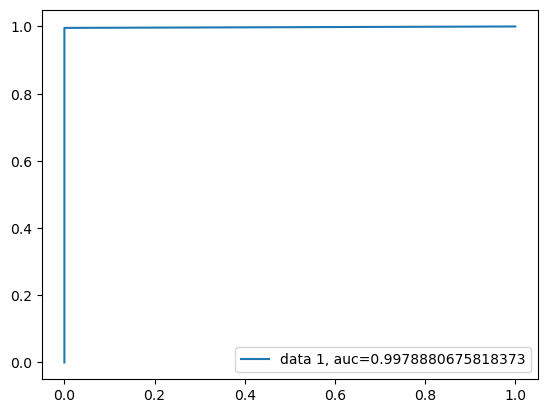

In [7]:
# Calculate ROC curve and AUC
fpr, tpr, _ = imports.metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = imports.metrics.roc_auc_score(y_test, y_pred)

# Plot ROC curve
# Convert AUC value to string before concatenating
imports.plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

imports.plt.legend(loc=4)
imports.plt.show()


In [11]:
explainer = imports.shap.Explainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)
shap_values

array([[-0.0437284 , -0.01081171, -0.43126412, ..., -0.49304842,
        -0.08070633, -0.83681998],
       [-0.0437284 , -0.01081171, -0.43126412, ..., -0.49304842,
        -0.08070633, -0.83681998],
       [ 0.10705918,  0.04925335,  0.87559684, ...,  1.33305683,
        -0.08070633,  1.69899814],
       ...,
       [ 0.10705918,  0.04925335,  0.87559684, ...,  1.33305683,
        -0.08070633,  1.69899814],
       [-0.0437284 , -0.01081171, -0.43126412, ..., -0.49304842,
        -0.08070633, -0.83681998],
       [ 0.10705918,  0.04925335,  0.87559684, ...,  1.33305683,
        -0.08070633,  1.69899814]])

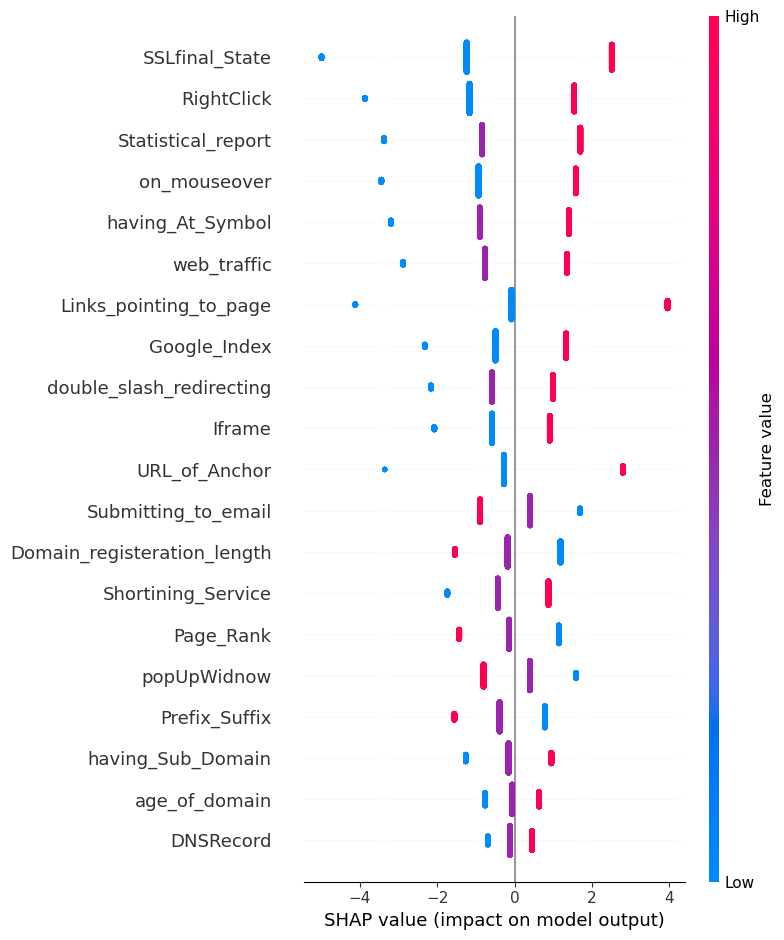

In [10]:
imports.shap.summary_plot(shap_values, X_test)

Random Forest Classifier

In [12]:
rfc = imports.RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_rfc_pred = logreg.predict(X_test)

In [13]:
cnf_rfc_matrix = imports.metrics.confusion_matrix(y_test, y_rfc_pred)
cnf_rfc_matrix

array([[1013,    0],
       [   4,  943]])

In [14]:
print(imports.classification_report(y_test, y_rfc_pred, target_names=target_names))

              precision    recall  f1-score   support

Not phishing       1.00      1.00      1.00      1013
    Phishing       1.00      1.00      1.00       947

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



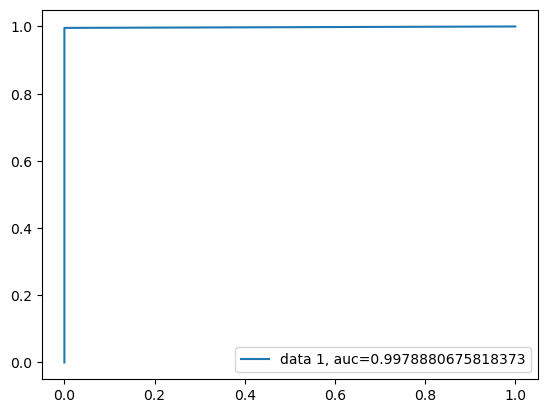

In [15]:
# Calculate ROC curve and AUC
fpr, tpr, _ = imports.metrics.roc_curve(y_test, y_rfc_pred, pos_label=1)
auc = imports.metrics.roc_auc_score(y_test, y_rfc_pred)

# Plot ROC curve
# Convert AUC value to string before concatenating
imports.plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

imports.plt.legend(loc=4)
imports.plt.show()


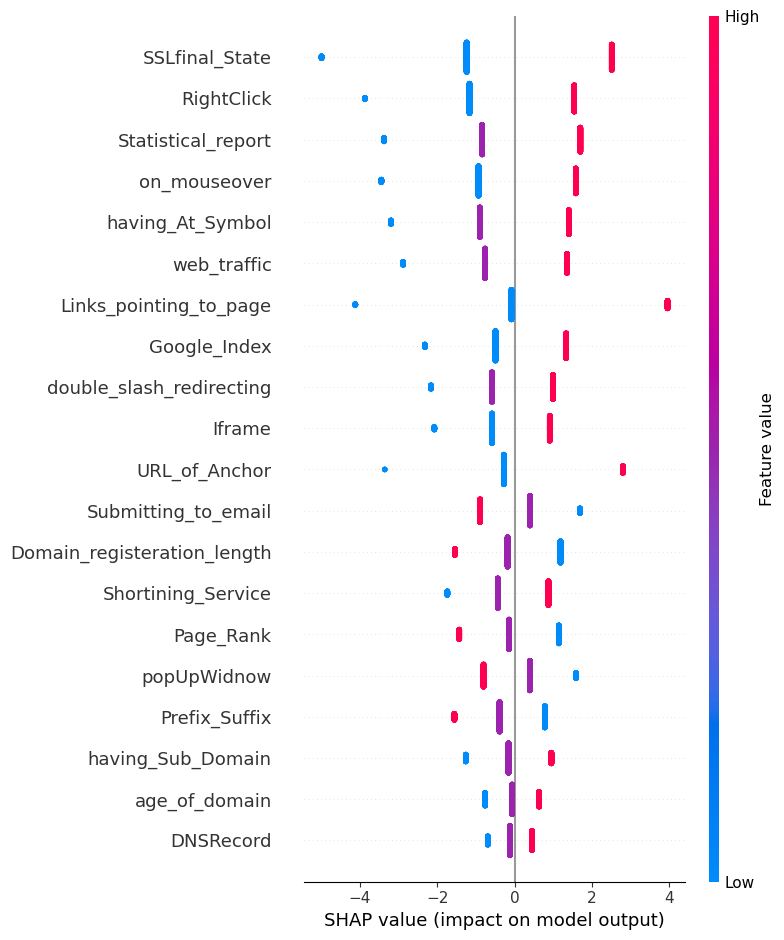

In [17]:
explainer = imports.shap.Explainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)
imports.shap.summary_plot(shap_values, X_test)

In [19]:
# Calculate the absolute SHAP values for each feature
abs_shap_values = imports.np.abs(shap_values)

# Calculate the mean absolute SHAP values for each feature across all instances
mean_abs_shap_values = imports.np.mean(abs_shap_values, axis=0)

# Create a DataFrame to store feature names and their mean absolute SHAP values
shap_df = imports.pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_ABS_SHAP': mean_abs_shap_values
})

# Sort the DataFrame by mean absolute SHAP values in descending order
shap_df_sorted = shap_df.sort_values(by='Mean_ABS_SHAP', ascending=False)

# Print the sorted DataFrame
print(shap_df_sorted)


                        Feature  Mean_ABS_SHAP
7                SSLfinal_State       1.940597
20                   RightClick       1.398919
29           Statistical_report       1.354153
19                 on_mouseover       1.331867
3              having_At_Symbol       1.251067
25                  web_traffic       1.102174
28       Links_pointing_to_page       0.956370
27                 Google_Index       0.944693
4      double_slash_redirecting       0.853445
22                       Iframe       0.794591
13                URL_of_Anchor       0.748077
16          Submitting_to_email       0.704004
8   Domain_registeration_length       0.703264
2            Shortining_Service       0.701398
26                    Page_Rank       0.674026
21                  popUpWidnow       0.665377
5                 Prefix_Suffix       0.661853
6             having_Sub_Domain       0.496703
23                age_of_domain       0.366858
24                    DNSRecord       0.314979
15           

# New Dataset with top contributing features from SHAP values

In [54]:
X= df[['RightClick', 'on_mouseover', 'having_At_Symbol',
       'Links_pointing_to_page', 'Google_Index', 'double_slash_redirecting']]

y=df['Result']

X_train, X_test, y_train, y_test = imports.train_test_split(X,y, test_size=0.2, random_state = 43)

In [55]:
logreg=imports.LogisticRegression(random_state=43)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [56]:
cnf_matrix = imports.metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[998,   0],
       [ 13, 949]])

In [57]:
target_names = ['Not phishing', 'Phishing']
print(imports.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not phishing       0.99      1.00      0.99       998
    Phishing       1.00      0.99      0.99       962

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



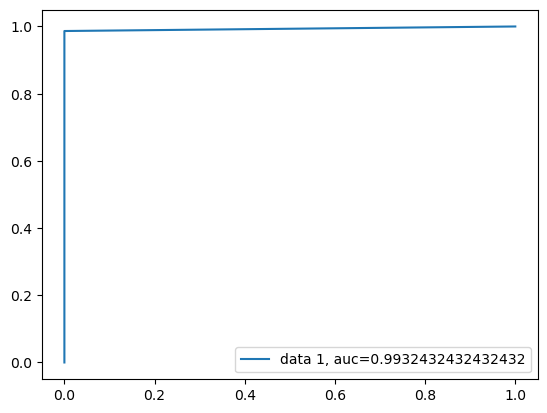

In [58]:
# Calculate ROC curve and AUC
fpr, tpr, _ = imports.metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = imports.metrics.roc_auc_score(y_test, y_pred)

# Plot ROC curve
# Convert AUC value to string before concatenating
imports.plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

imports.plt.legend(loc=4)
imports.plt.show()
